In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("comp_auc.csv", names=["base", "h2s", "i", "k", "method", "svm", "lr"])
df

,base,h2s,i,k,method,svm,lr
0,1.2,0.3,10,5,p,0.530590,0.684372
1,1.2,0.3,10,25,p,0.643076,0.651974
2,1.2,0.3,10,100,p,0.612903,0.667686
3,1.2,0.3,10,300,p,0.653782,0.852336
4,1.2,0.3,10,5,ae,0.580228,0.658509
...,...,...,...,...,...,...,...
3595,6.0,0.8,9,300,ae,0.772208,0.862434
3596,6.0,0.8,9,5,ln,0.373434,0.786689
3597,6.0,0.8,9,25,ln,0.662211,0.888053
3598,6.0,0.8,9,100,ln,0.832916,0.895851


In [26]:
with open("nlines", 'r') as f:
    out = np.array([line.lstrip().rstrip().split(' ') for line in f.readlines()])

['24' 'results_comp/base_1.2/h2s_0.3/sim_1/n_causals.csv']
['20' 'results_comp/base_1.2/h2s_0.5/sim_1/n_causals.csv']
['20' 'results_comp/base_1.2/h2s_0.8/sim_1/n_causals.csv']
['20' 'results_comp/base_2/h2s_0.3/sim_1/n_causals.csv']
['20' 'results_comp/base_2/h2s_0.5/sim_1/n_causals.csv']
['16' 'results_comp/base_2/h2s_0.8/sim_1/n_causals.csv']

In [49]:
from functools import reduce
for row in out[:-1]:
    if row[0] != '12':
        with open(row[1], 'r') as f:
            lines = f.readlines()[-12:]
            act = reduce(str.__add__, lines)
        with open(row[1], 'w') as f:
            f.writelines(act)

In [33]:
!cat results_comp/base_1.2/h2s_0.3/sim_1/n_causals.csv

p,5,2
p,25,3
p,100,3
p,300,8
ae,5,1
ae,25,2
ae,100,4
ae,300,7
ln,5,2
ln,25,3
ln,100,3
ln,300,6
1.2,0.3,1,5,p,2
1.2,0.3,1,25,p,3
1.2,0.3,1,100,p,3
1.2,0.3,1,300,p,8
1.2,0.3,1,5,ae,1
1.2,0.3,1,25,ae,2
1.2,0.3,1,100,ae,3
1.2,0.3,1,300,ae,5
1.2,0.3,1,5,ln,2
1.2,0.3,1,25,ln,3
1.2,0.3,1,100,ln,4
1.2,0.3,1,300,ln,7


In [51]:
nc = pd.read_csv("n_causals.csv", names=["base", "h2s", "i", "k", "method", "n_causals"])
nc

,base,h2s,i,k,method,n_causals
0,1.2,0.3,10,5,p,0
1,1.2,0.3,10,25,p,0
2,1.2,0.3,10,100,p,2
3,1.2,0.3,10,300,p,6
4,1.2,0.3,10,5,ae,1
...,...,...,...,...,...,...
3595,6.0,0.8,9,300,ae,6
3596,6.0,0.8,9,5,ln,2
3597,6.0,0.8,9,25,ln,4
3598,6.0,0.8,9,100,ln,7


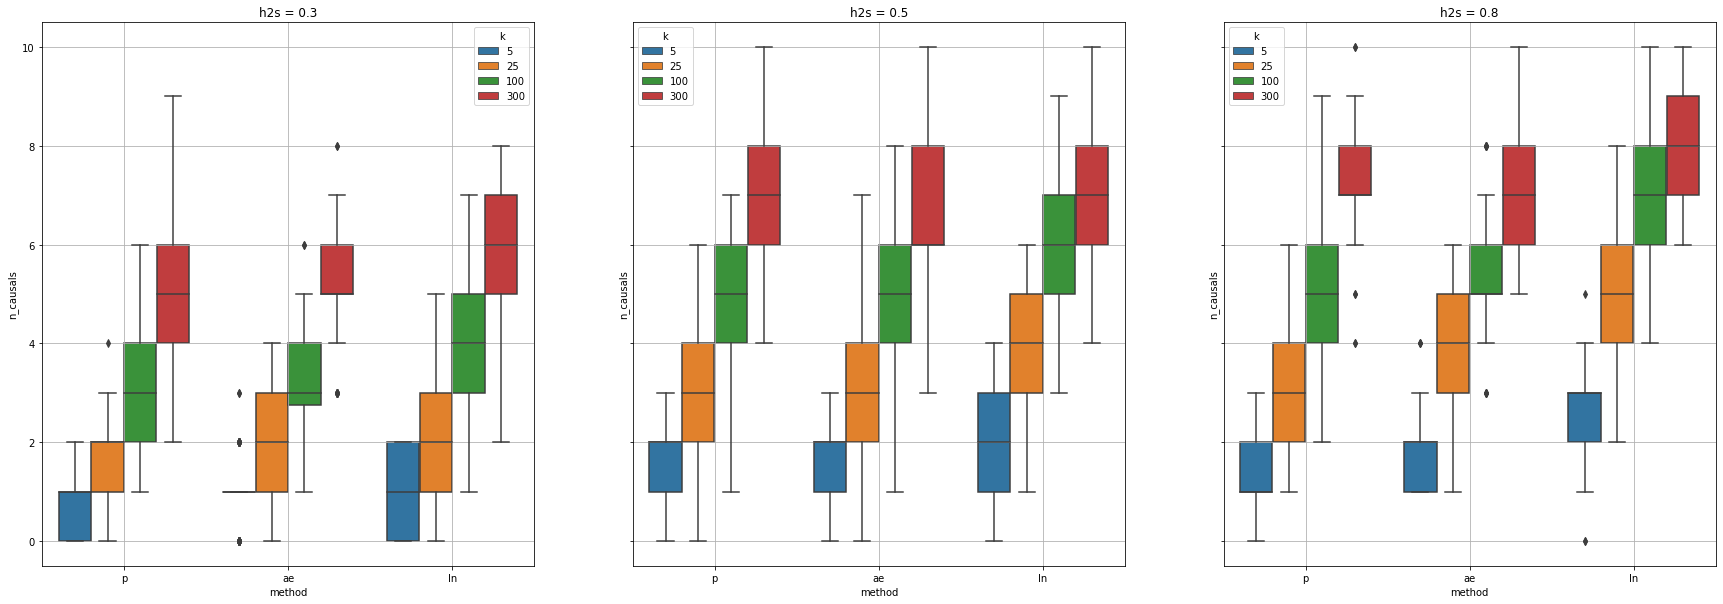

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
for i, h2s in enumerate(["0.3", "0.5", "0.8"]):
    plt.sca(axes[i])
    tdf = nc.query(f"h2s == {h2s}")

    sns.boxplot(x=tdf["method"], y=tdf["n_causals"], hue=tdf["k"])
    plt.title(f"h2s = {h2s}")
    plt.grid()
    
    plt.savefig("three_methods_h2s_ncausals.jpeg")

<AxesSubplot:xlabel='method', ylabel='svm'>

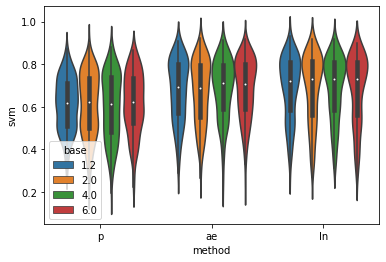

In [4]:
sns.violinplot(x=df["method"], y=df["svm"], hue=df["base"])

In [7]:
df.query("h2s == 0.3 & base == 1.2")

,base,h2s,i,k,method,svm,lr
0,1.2,0.3,10,5,p,0.530590,0.684372
1,1.2,0.3,10,25,p,0.643076,0.651974
2,1.2,0.3,10,100,p,0.612903,0.667686
3,1.2,0.3,10,300,p,0.653782,0.852336
4,1.2,0.3,10,5,ae,0.580228,0.658509
...,...,...,...,...,...,...,...
295,1.2,0.3,9,300,ae,0.726260,0.739627
296,1.2,0.3,9,5,ln,0.507380,0.568365
297,1.2,0.3,9,25,ln,0.655528,0.703982
298,1.2,0.3,9,100,ln,0.670008,0.729602


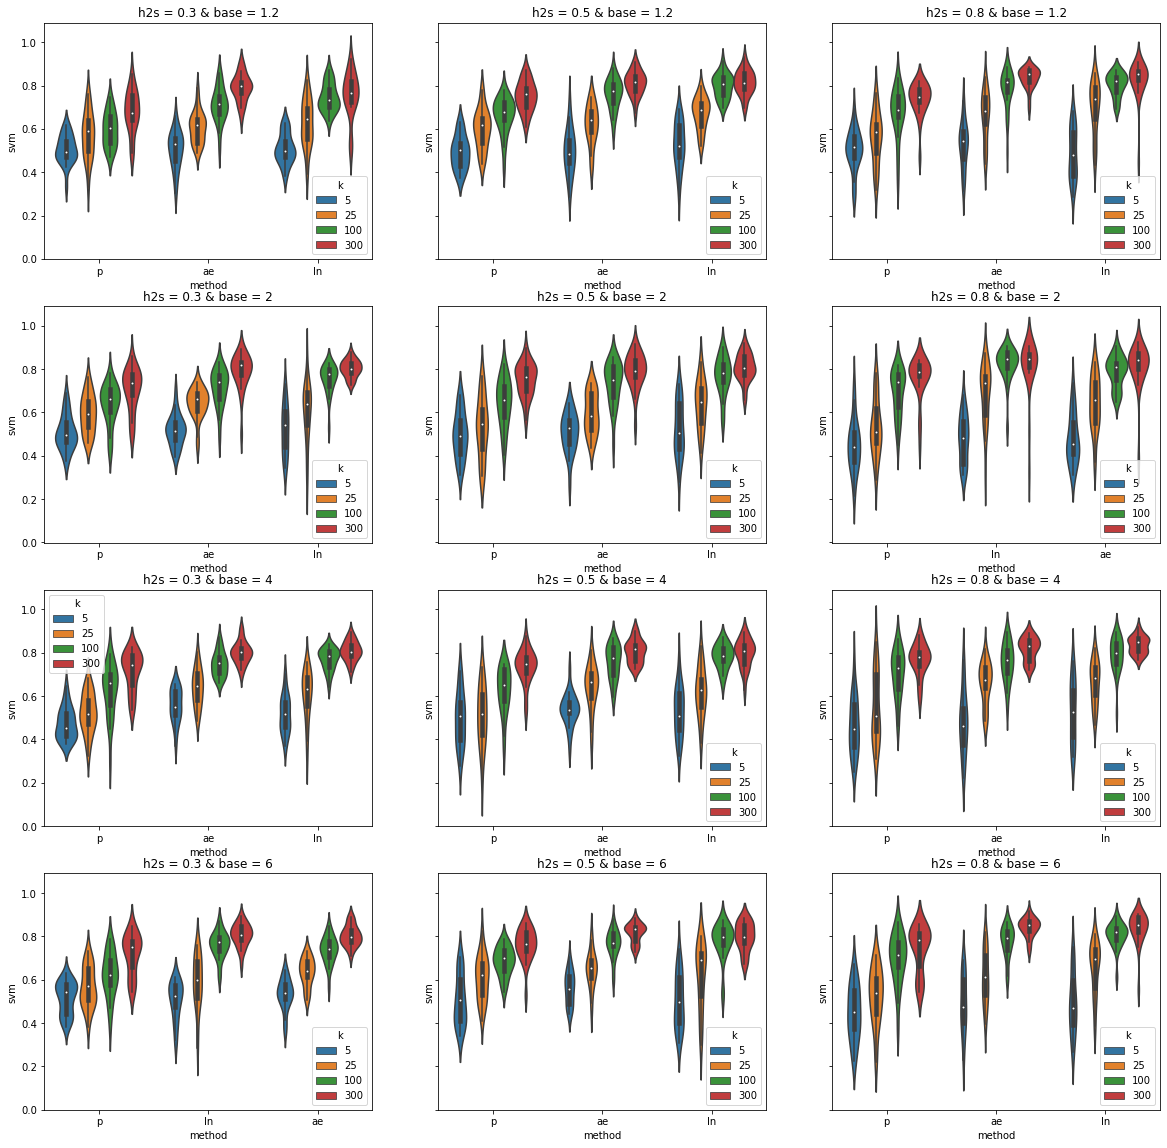

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)
for i, h2s in enumerate(["0.3", "0.5", "0.8"]):
    for j, base in enumerate(["1.2", "2", "4", "6"]):
        plt.sca(axes[j, i])
        tdf = df.query(f"h2s == {h2s} & base == {base}")
        
        sns.violinplot(x=tdf["method"], y=tdf["svm"], hue=tdf["k"])
        plt.title(f"h2s = {h2s} & base = {base}")

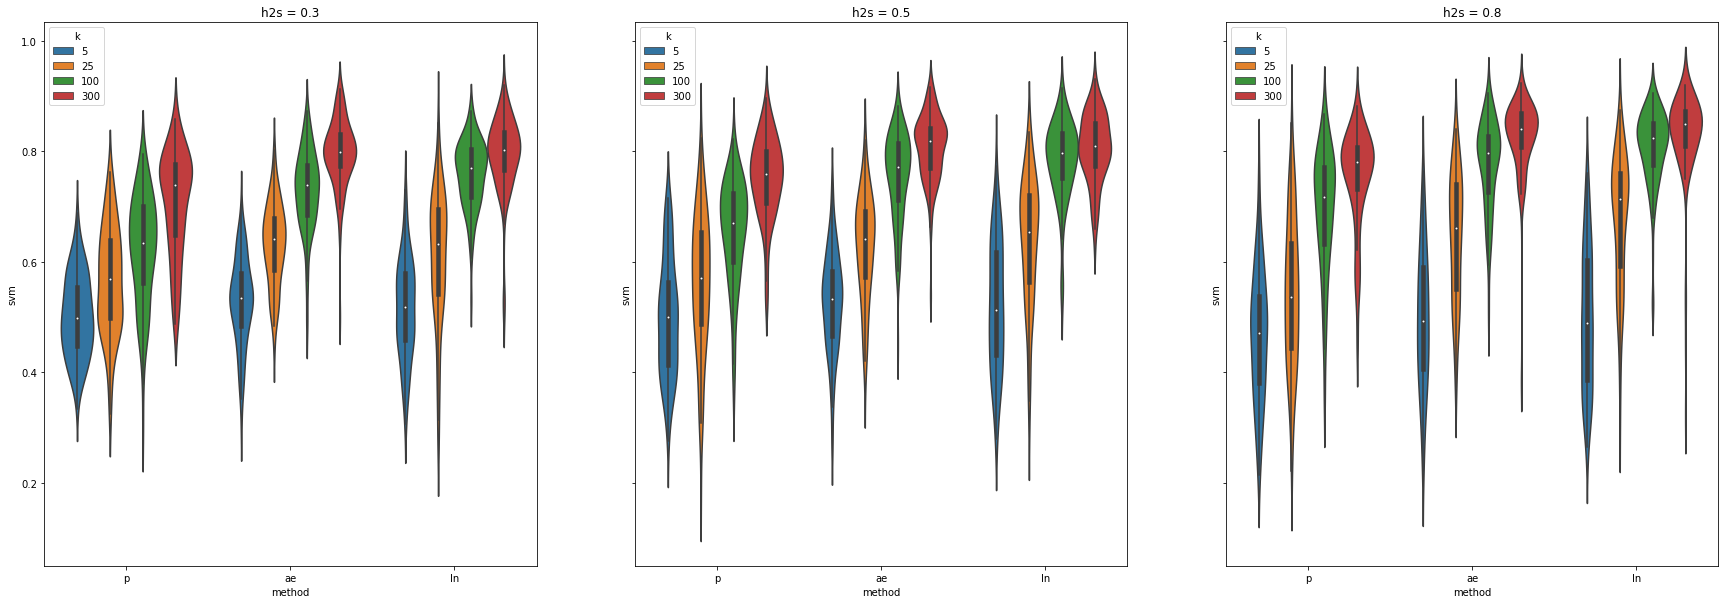

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
for i, h2s in enumerate(["0.3", "0.5", "0.8"]):
    plt.sca(axes[i])
    tdf = df.query(f"h2s == {h2s}")

    sns.violinplot(x=tdf["method"], y=tdf["svm"], hue=tdf["k"])
    plt.title(f"h2s = {h2s}")
    
    plt.savefig("three_methods_h2s.jpeg")

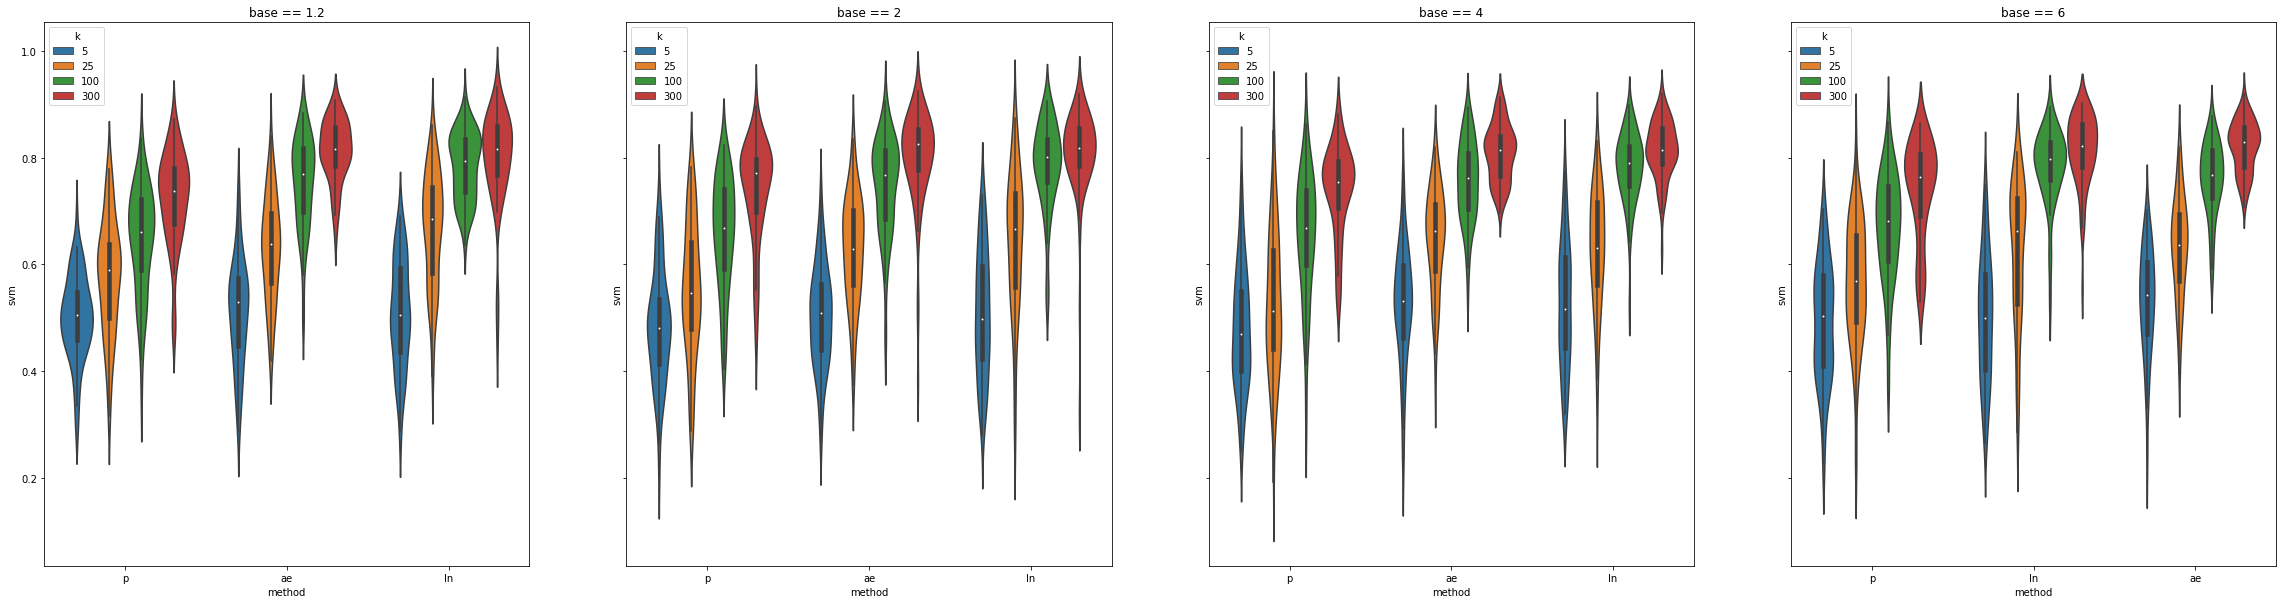

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(40, 10), sharey=True)
for j, base in enumerate(["1.2", "2", "4", "6"]):
    plt.sca(axes.ravel()[j])
    tdf = df.query(f"base == {base}")

    sns.violinplot(x=tdf["method"], y=tdf["svm"], hue=tdf["k"])
    plt.title(f"base == {base}")